In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mitali/Python/Dataset/laptop_price.csv", encoding = 'unicode_escape')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
# Provides concise summary of dataframes, Data type and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
# Value counts gives the frequency of occuring of each item in column
df['TypeName'].value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


In [ ]:
df['Company'].value_counts()

,count
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [ ]:
df['Product'].value_counts()

,count
Product,
XPS 13,30
Inspiron 3567,29
250 G6,21
Legion Y520-15IKBN,19
Vostro 3568,19
...,...
15-bw007nv (A10-9620P/6GB/128GB/Radeon,1
SmartBook 130,1
A541NA-GO342 (N3350/4GB/500GB/Linux),1


1. Drop Laptop Id column bcz it contains only row numbers which are not useful
2. Drop Product column bcz it contains 618 rows which will be difficult to analyze w.r.t price

In [ ]:
df.drop(columns = ['Product','laptop_ID'], inplace = True)

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1163,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,8GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.2kg,459.0


In [ ]:
# checking null values
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [ ]:
# cheking duplicate values
df.duplicated().sum()

29

In [ ]:
# Dropping Duplicate values
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(1274, 11)

# Converting price column from euros to INR

In [ ]:
df['Price_euros'] * 89.07  # 89.07 is the recent price of 1 euro in INR

,Price_euros
0,119326.1883
1,80068.5858
2,51215.2500
3,226010.6715
4,160646.6520
...,...
1269,64158.9024
1270,56826.6600
1271,133515.9300
1272,20397.0300


In [ ]:
# Rounding of the values
round(df['Price_euros'] * 89.07)

,Price_euros
0,119326.0
1,80069.0
2,51215.0
3,226011.0
4,160647.0
...,...
1269,64159.0
1270,56827.0
1271,133516.0
1272,20397.0


In [ ]:
#assigning to the same col
df['Price_euros'] = round(df['Price_euros'] * 89.07)

In [ ]:
# Converting Data type to int
df['Price_euros'] = round(df['Price_euros'] * 89.07).astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price_euros       1274 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 119.4+ KB


In [ ]:
# rename the column
df.rename(columns = {'Price_euros' : 'Price'}, inplace = True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,10628367
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7131746
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,4561720
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,20130800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,14308828


# Converting data type of Ram column

In [ ]:
df['Ram'].value_counts()

,count
Ram,
8GB,613
4GB,366
16GB,198
6GB,35
12GB,25
32GB,17
2GB,16
24GB,3
64GB,1


In [ ]:
df['Ram'].apply(lambda a: a.replace("GB", ""))

,Ram
0,8
1,8
2,8
3,16
4,8
...,...
1269,4
1270,4
1271,16
1272,2


In [ ]:
df['Ram'].apply(lambda a : a.replace("GB", "")).astype('int')

,Ram
0,8
1,8
2,8
3,16
4,8
...,...
1269,4
1270,4
1271,16
1272,2


In [ ]:
df['Ram'] = df['Ram'].apply(lambda a: a.replace("GB", "")).astype('int')

In [ ]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
234,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.6kg,5466137
638,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,13942394
1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,31535501


# Converting data type of Weight column

In [ ]:
df['Weight']=df['Weight'].apply(lambda b : b.replace("kg", "")).astype('float')

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
265,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.67,6338845


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 119.4+ KB


# EDA

1. Fluctuation of price w.r.t Ram

<Axes: xlabel='Ram', ylabel='Price'>

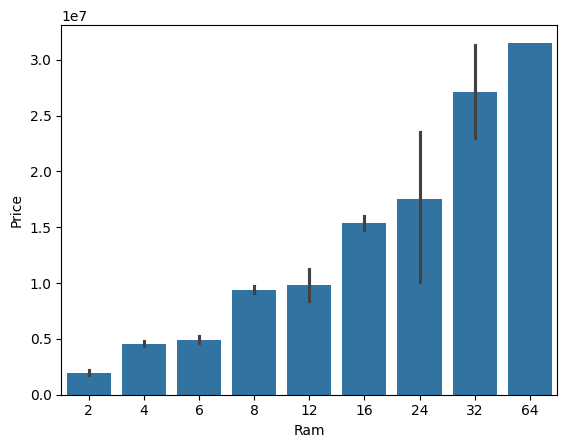

In [ ]:
sns.barplot(x = df['Ram'], y = df['Price'])

The graph shows a strong correlation between RAM capacity and laptop prices, with 64 GB RAM laptops being the most expensive, followed by 32 GB and 24 GB RAM configurations at progressively lower price points. This indicates that higher RAM capacities drive up laptop costs, making them more suitable for users with high-performance requirements.
Note: The black line on bar represents the outliers, the bigger the lines the maximum outliers

# Fluctuation of price w.r.t weight

In [ ]:
df['Weight'].value_counts()

,count
Weight,
2.20,119
2.10,58
2.00,45
2.40,42
2.50,38
...,...
4.50,1
1.14,1
3.80,1


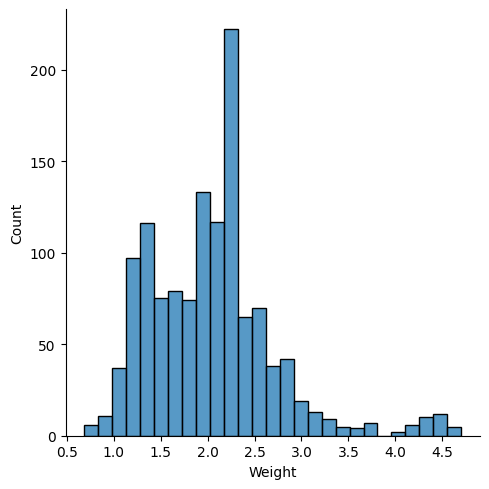

In [ ]:
# distplot combines the histogram with optional KDE(Kernel Density Estimate) curve to provide insights into the data distribution
sns.displot(df['Weight'])

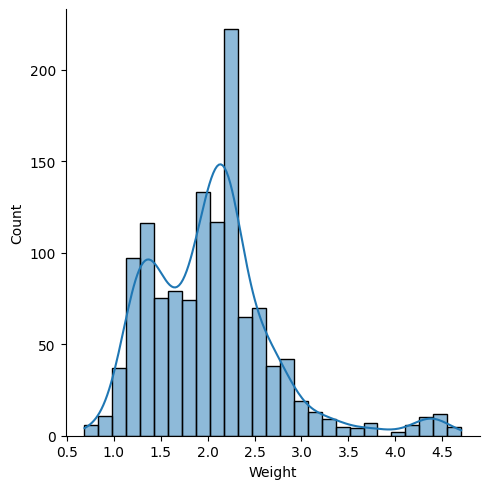

In [ ]:
sns.displot(df['Weight'], kde = True)

<Axes: xlabel='Weight', ylabel='Price'>

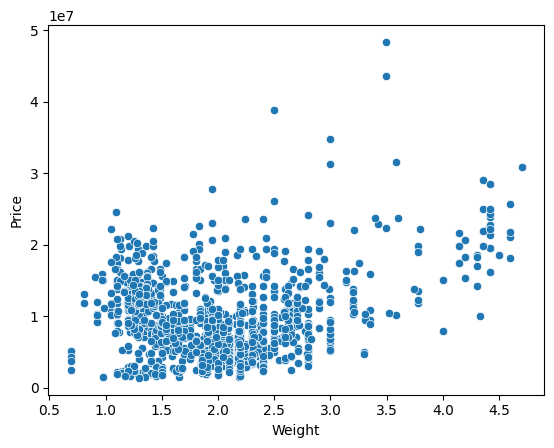

In [ ]:
sns.scatterplot(x = df['Weight'], y = df['Price'])


The scatter plot shows a positive correlation between weight and price, where heavier items generally have higher prices. Most data points are concentrated in the weight range of 1.0 to 2.5 and prices below 2 million, while higher weights exhibit greater price variability and a few outliers with extremely high prices.

# Price varies company to company

In [ ]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


<Axes: xlabel='Company'>

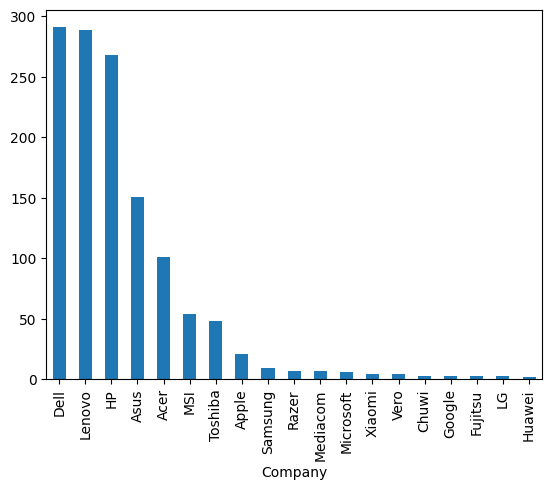

In [ ]:
df['Company'].value_counts().plot(kind = 'bar')

messy graph . i cannot judge a price of company based on just 2,3, or 9 laptops. so i will take only those companies that have a good count of laptop i.e 10 or >10

In [ ]:
# Filtering the companies which are repeated more than 10 times in the dataset
df.groupby('Company')['Company'].transform('count')>10

,Company
0,True
1,True
2,True
3,True
4,True
...,...
1269,True
1270,True
1271,True
1272,True


In [ ]:
df = df[df.groupby('Company')['Company'].transform('count')>10]


In [ ]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21


<Axes: xlabel='Company', ylabel='Price'>

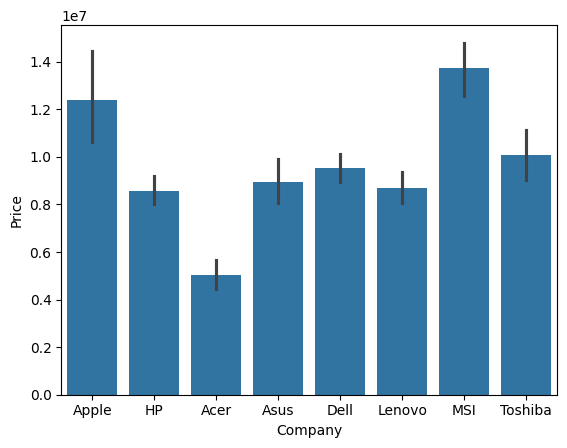

In [ ]:
sns.barplot(x = df['Company'], y = df['Price'])

from above graph we can see that MSI, Apple and Toshiba have the highest price respectively.

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
924,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,14478596


In [ ]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,687
Gaming,200
Ultrabook,171
2 in 1 Convertible,114
Workstation,29
Netbook,22


<Axes: xlabel='TypeName'>

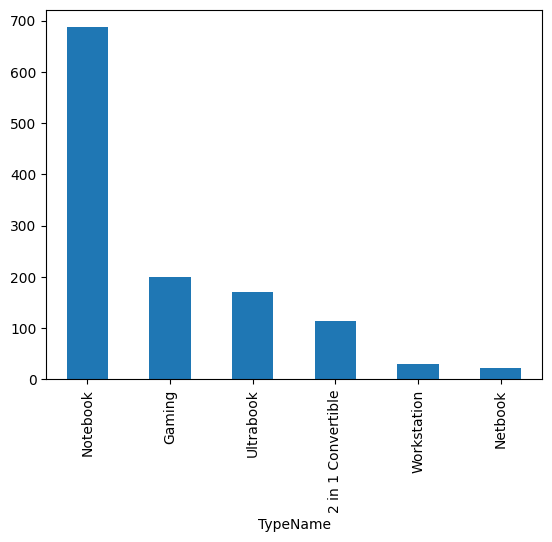

In [ ]:
#frequency bar plot
df['TypeName'].value_counts().plot(kind = 'bar')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

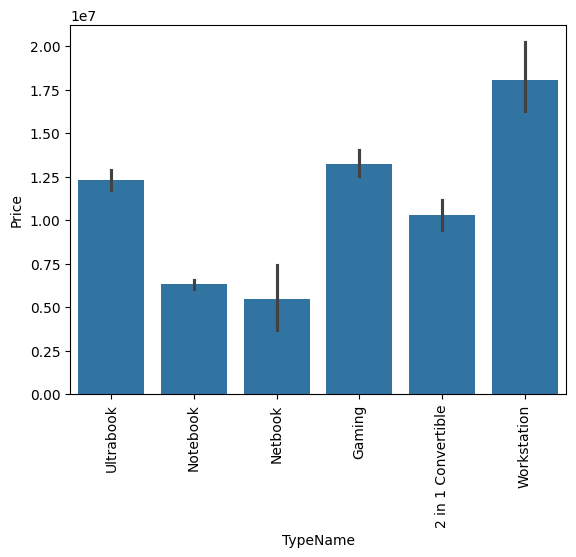

In [ ]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 90)

Workstations have the highest average price, followed by Gaming laptops and Ultrabooks, suggesting they are premium categories. Notebooks and Netbooks have the lowest average prices, indicating they are budget-friendly options. Price variability is most notable in Workstations and Netbooks

#Inches VS Price

In [ ]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29
12.0,6
13.9,6
15.4,4


In [ ]:
df = df[df.groupby('Inches')['Inches'].transform('count')>10]

In [ ]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29


<Axes: xlabel='Inches'>

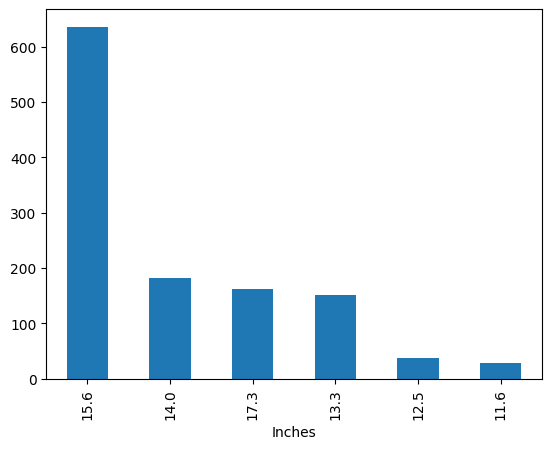

In [ ]:
df['Inches'].value_counts().plot(kind = 'bar')

Inches VS Price

<Axes: xlabel='Inches', ylabel='Price'>

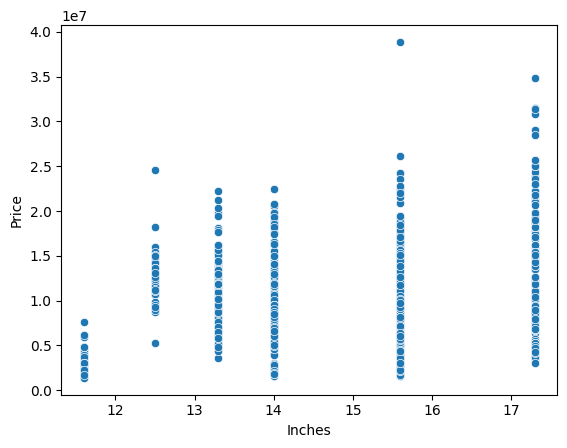

In [ ]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

The scatterplot displays the relationship between "Inches" and "Price." It shows that larger screen sizes tend to have higher prices, with significant variation within each size.

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
873,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,180GB SSD,Intel HD Graphics 620,Windows 10,1.44,5831057


#Screenresolution vs price

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


Formula to calculate PPI(Pixel per inch):
PPI = √ (Horizontal pixels ^2 + Vertical pixels ^2) / Diagonal screen size

In [ ]:
# To get the x and y resolutions seperately
a = 'Touchscreen / Quad HD+ 3200x1800'


In [ ]:
# we can not apply negative slicing on string since the data type of a is string. use spilt instead to get the items in list
a.split()

['Touchscreen', '/', 'Quad', 'HD+', '3200x1800']

In [ ]:
a.split()[-1]

'3200x1800'

In [ ]:
a.split()[-1].split('x')

['3200', '1800']

In [ ]:
# will give x resolution
a.split()[-1].split('x')[0]

'3200'

In [ ]:
# will give y resolution
a.split()[-1].split('x')[1]

'1800'

In [ ]:
(lambda x: x.split()[-1].split('x')[0])('IPS Panel Touchscreen / 4K Ultra HD 3840x2160	')

'3840'

In [ ]:
(lambda x: x.split()[-1].split('x')[1])('IPS Panel Touchscreen / 4K Ultra HD 3840x2160	')

'2160'

In [ ]:
df['ScreenResolution'].apply((lambda x: x.split()[-1].split('x')[0])).astype('int')

,ScreenResolution
0,2560
1,1440
2,1920
4,2560
5,1366
...,...
1269,1366
1270,1920
1271,3200
1272,1366


In [ ]:
df['X_Resolution'] = df['ScreenResolution'].apply((lambda x: x.split()[-1].split('x')[0])).astype('int')

In [ ]:
df['X_Resolution']

,X_Resolution
0,2560
1,1440
2,1920
4,2560
5,1366
...,...
1269,1366
1270,1920
1271,3200
1272,1366


In [ ]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Resolution
1127,HP,Ultrabook,12.5,1366x768,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,15033947,1366
806,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,6188138,1366


In [ ]:
df['Y_Resolution'] = df['ScreenResolution'].apply((lambda x: x.split()[-1].split('x')[1])).astype('int')
df['Y_Resolution']

,Y_Resolution
0,1600
1,900
2,1080
4,1600
5,768
...,...
1269,768
1270,1080
1271,1800
1272,768


In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Resolution,Y_Resolution
438,Lenovo,Ultrabook,14.0,2560x1440,Intel Core i7 7500U 2.7GHz,24,512GB SSD,Intel HD Graphics 620,Windows 10,1.32,18897537,2560,1440


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1198 non-null   object 
 1   TypeName          1198 non-null   object 
 2   Inches            1198 non-null   float64
 3   ScreenResolution  1198 non-null   object 
 4   Cpu               1198 non-null   object 
 5   Ram               1198 non-null   int64  
 6   Memory            1198 non-null   object 
 7   Gpu               1198 non-null   object 
 8   OpSys             1198 non-null   object 
 9   Weight            1198 non-null   float64
 10  Price             1198 non-null   int64  
 11  X_Resolution      1198 non-null   int64  
 12  Y_Resolution      1198 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 131.0+ KB


In [ ]:
#creating ppi column
((df['X_Resolution']**2) + (df['Y_Resolution'])**2)** 0.5

,0
0,3018.873962
1,1698.116604
2,2202.907170
4,3018.873962
5,1567.092850
...,...
1269,1567.092850
1270,2202.907170
1271,3671.511950
1272,1567.092850


In [ ]:
df['PPI'] = round(((df['X_Resolution']**2) + (df['Y_Resolution'])**2)** 0.5 / df['Inches'])

In [ ]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Resolution,Y_Resolution,PPI
1031,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,6,1TB HDD,AMD Radeon R5,Windows 10,2.10,3244820,1366,768,100.0
602,Acer,Notebook,14.0,Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.60,2610107,1920,1080,157.0
773,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,8718884,1920,1080,141.0


<Axes: xlabel='PPI', ylabel='Price'>

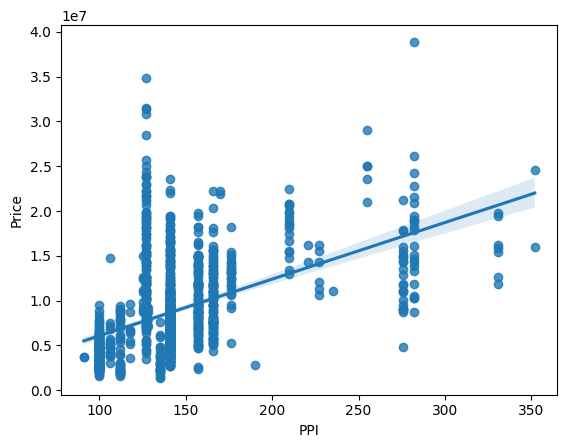

In [ ]:
# Price vs PPI
sns.regplot(x = df['PPI'], y = df['Price'])

1. What does the graph signify?
The graph shows the relationship between "PPI" (Pixels Per Inch, indicating screen resolution) and "Price." It suggests that as PPI increases, the price also tends to increase, indicating a positive correlation.

2. What does the line signify?
The line represents the linear regression line, which is the best-fit line summarizing the relationship between PPI and price. It indicates the average trend of how price changes with PPI.

3. What is the shaded portion in the graph?
The shaded portion around the regression line represents the confidence interval. It shows the range within which the true regression line is likely to fall with a certain level of confidence (often 95%).

#Creating two col IPS(shows the laptop has ips display or not), touchscreen

In [ ]:
a = 'IPS Panel Full HD 1920x1080'
(lambda a: 1 if ('IPS') in a else 0)('IPS Panel Full HD 1920x1080')

1

In [ ]:
df['IPS'] = df['ScreenResolution'].apply(lambda a: 1 if ('IPS') in a else 0)

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Resolution,Y_Resolution,PPI,IPS
456,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.7GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,16231850,1920,1080,127.0,1


In [ ]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda a: 1 if ('Touchscreen') in a else 0)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Resolution,Y_Resolution,PPI,IPS,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,10628367,2560,1600,227.0,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7131746,1440,900,128.0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,4561720,1920,1080,141.0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,14308828,2560,1600,227.0,1,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,3173386,1366,768,100.0,0,0


<Axes: xlabel='Touchscreen'>

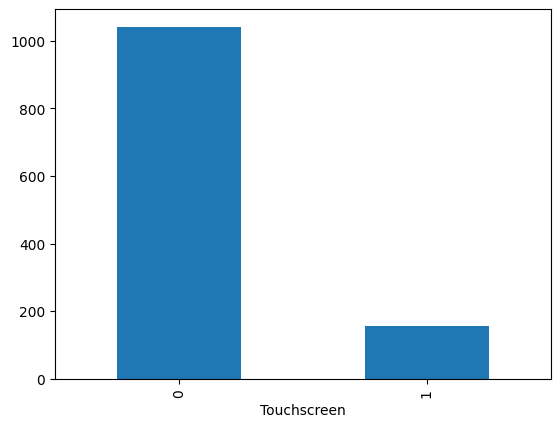

In [ ]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='IPS'>

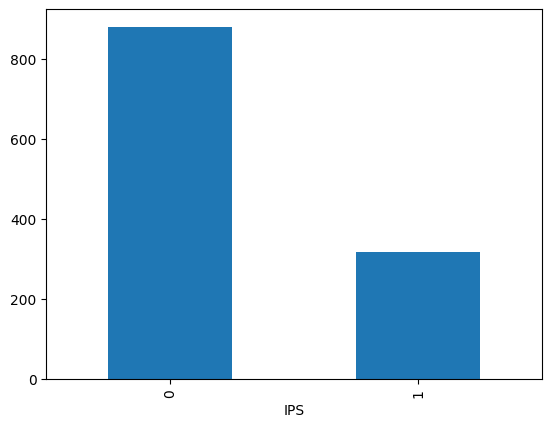

In [ ]:
df['IPS'].value_counts().plot(kind = 'bar')

In [ ]:
#drop the unnecessary columns(x & y resolution kadhlela ppi calculate karayla)
df.drop(columns = ['ScreenResolution', 'Inches','X_Resolution','Y_Resolution'], inplace = True)

In [ ]:
df.shape

(1198, 12)

#CPU VS Price

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,122
Intel Core i5 8250U 1.6GHz,70
Intel Core i7 8550U 1.8GHz,68
...,...
AMD E-Series E2-9000 2.2GHz,1
Intel Core i5 2.0GHz,1
Intel Core M M3-6Y30 0.9GHz,1


In [ ]:
# using traditional function instead of lambda bcz complex expressions
a = 'Intel Core i5 7200U 2.5GHz'
a.split()    # to convert string into list


['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [ ]:
a.split()[:3]

['Intel', 'Core', 'i5']

In [ ]:
# to convert the list into string
" ".join(a.split()[:3])

'Intel Core i5'

In [ ]:
(lambda a: " ".join(a.split()[:3]))('Intel Core i5 7200U 2.5GHz')

'Intel Core i5'

In [ ]:
df['Cpu'] = df['Cpu'].apply(lambda a: " ".join(a.split()[:3]))

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,483
Intel Core i5,409
Intel Core i3,133
Intel Celeron Dual,64
Intel Pentium Quad,27
AMD A9-Series 9420,11
Intel Core M,10
AMD A6-Series 9220,8
AMD A12-Series 9720P,7


from above o/p we can see that lots of things are repeating for ex.AMD E-Series, to overcome that we do the following steps

jar
AMD A6-Series 7310 --> AMD A-Series,
AMD E-Series E2-9000 --> AMD E-Series,
AMD FX 8800P --> AMD F-Series


In [ ]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  elif text.split()[0] == 'Intel':
    return "Other Intel Processor"
  else:
    if text[4] == 'E':
      return "AMD E-Series"
    elif text[4] == 'A':
      return "AMD A-Series"
    elif text[4] == 'F':
      return "AMD F-Series"
    else:
      return "AMD Ryzen Series"

In [ ]:
#checking the working of above code . take any one value in paranthesis
fetch_processor('AMD A10-Series A10-9620P')

'AMD A-Series'

In [ ]:
df['Cpu'] = df['Cpu'].apply(fetch_processor)

<Axes: xlabel='Cpu'>

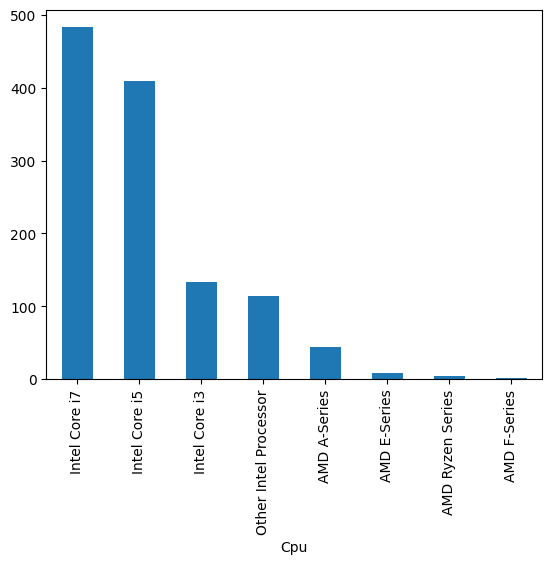

In [ ]:
df['Cpu'].value_counts().plot(kind = 'bar')

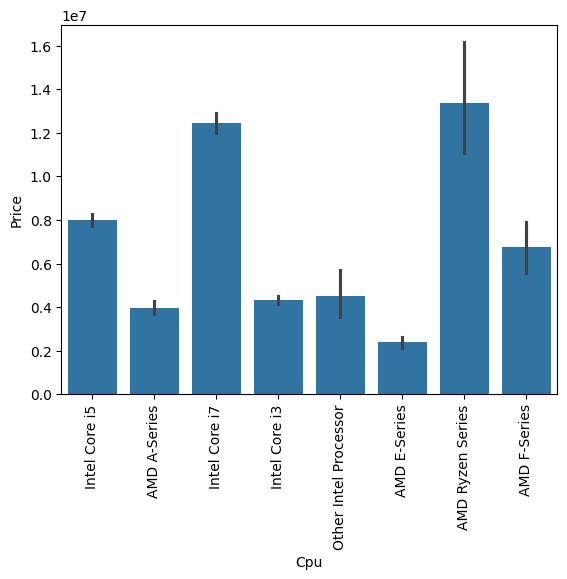

In [ ]:
sns.barplot(x = df['Cpu'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

The bar plot shows that AMD Ryzen series, Intel Core i7, and Intel Core i5 have the highest prices, indicating these processors are likely targeting the high-performance or gaming market.

#GPU VS Price


In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,262
Intel HD Graphics 520,179
Nvidia GeForce GTX 1050,65
Intel UHD Graphics 620,64
Nvidia GeForce GTX 1060,45
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [ ]:
a = 'Intel HD Graphics 620'
a.split()[:2]

['Intel', 'HD']

In [ ]:
" ".join(a.split()[:2])

'Intel HD'

In [ ]:
(lambda a: " ".join(a.split()[:2]))('Nvidia GeForce GTX 1060	')

'Nvidia GeForce'

In [ ]:
df['Gpu'] = df['Gpu'].apply(lambda a: " ".join(a.split()[:2]))

In [ ]:
df['Gpu']

,Gpu
0,Intel Iris
1,Intel HD
2,Intel HD
4,Intel Iris
5,AMD Radeon
...,...
1269,Nvidia GeForce
1270,Intel HD
1271,Intel HD
1272,Intel HD


In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD,570
Nvidia GeForce,353
AMD Radeon,162
Intel UHD,64
Nvidia Quadro,31
Intel Iris,10
AMD FirePro,5
AMD R4,1
AMD R17M-M1-70,1


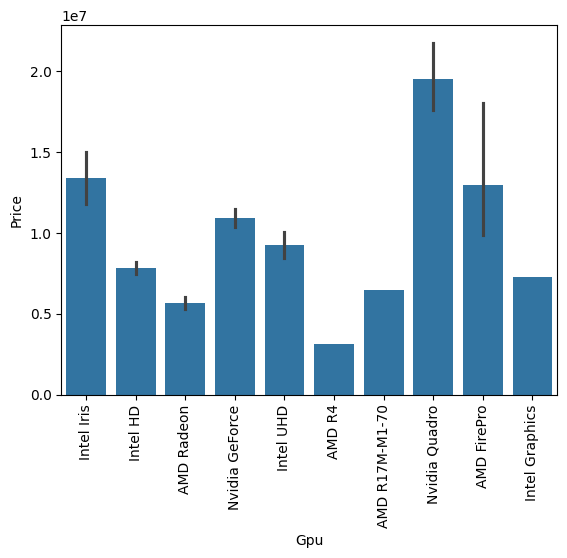

In [ ]:
sns.barplot(x = df['Gpu'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

The bar plot indicates that Nvidia Quadro, Intel Iris, and AMD FirePro GPUs have the highest prices, suggesting they are tailored for professional, high-end applications such as graphics design, video editing, and AI processing.

# Operating system VS price

In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,997
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
macOS,8
Mac OS X,3
Windows 10 S,2


In [ ]:
# windows 10 and windows 10 >> windows
# Mac OS X and macos >> macOS

def os(text):
  if text == 'Windows 10' or text == 'Windows 10 S':
    return 'Windows 10'
  elif text == 'Windows 7':
    return 'Windows 7'
  elif text == 'macOS' or text == 'Mac OS X':
    return 'mac OS'
  elif text == 'No OS':
    return 'No OS'
  elif text == 'Chrome OS':
    return 'Chrome OS'
  else:
    return 'Linux'


In [ ]:
os('Windows 10 S') # checking if the code works properly or not

'Windows 10'

In [ ]:
df['OpSys'] = df['OpSys'].apply(os)


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,999
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
mac OS,11


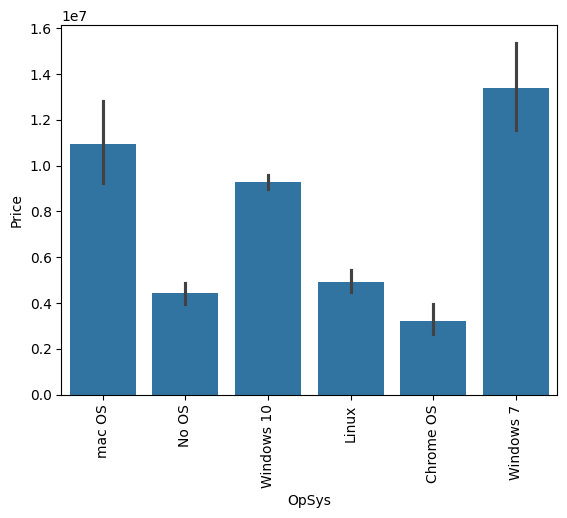

In [ ]:
sns.barplot( x= df['OpSys'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

 *****************something is wrong with the graph price of windows should not be higher than the macos . check the updated code or something*********************

In [ ]:
df[df['OpSys'] == 'Windows 7']['Price'].describe()  # it describes why windows 7 has high price than macOS just ask chatgpt if not understand

,Price
count,4.500000e+01
mean,1.338099e+07
std,6.172621e+06
min,5.847000e+06
25%,9.258114e+06
50%,1.186056e+07
75%,1.626659e+07
max,3.481996e+07


#Memory VS price


In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,IPS,Touchscreen
1216,Acer,Notebook,Intel Core i3,4,1TB HDD,Nvidia GeForce,Windows 10,3.3,4744224,106.0,0,0


In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,387
1TB HDD,213
500GB HDD,122
512GB SSD,99
128GB SSD + 1TB HDD,93
256GB SSD + 1TB HDD,73
128GB SSD,71
32GB Flash Storage,28
2TB HDD,16


from memory we can create cloumns HDD,SSD,Hybrid,Flash_Storage

In [ ]:
df['Memory'].str.split('+', n=1, expand = True)

,0,1
0,128GB SSD,None
1,128GB Flash Storage,None
2,256GB SSD,None
4,256GB SSD,None
5,500GB HDD,None
...,...,...
1269,500GB HDD,None
1270,128GB SSD,None
1271,512GB SSD,None
1272,64GB Flash Storage,None


In [ ]:
new = df['Memory'].str.split('+', n=1, expand = True)

In [ ]:
df['first'] = new[0]
df['first']

,first
0,128GB SSD
1,128GB Flash Storage
2,256GB SSD
4,256GB SSD
5,500GB HDD
...,...
1269,500GB HDD
1270,128GB SSD
1271,512GB SSD
1272,64GB Flash Storage


In [ ]:
new = df['Memory'].str.split('+', n=1, expand = True)
df['first'] = new[0]
df['first'] = df['first'].str.strip()  # strip is used to remove whitespaces
df['second'] = new[1]

df['Layer1HDD'] = df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['first'] = df['first'].str.replace(r'\D','', regex = True)

df['second'].fillna("0", inplace = True)

df['second'] = df['second'].str.strip()
df['Layer2HDD'] = df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x:1 if 'Flash_Storage' in x else 0)

df['second'] = df['second'].str.replace(r'\D','', regex = True)  # regex is used to validate or manipulate strings

df['first'] = df['first'].astype('int')
df['second'] = df['second'].astype('int')

df['HDD'] = df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD']
df['SSD'] = df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD']
df['Hybrid'] = df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid']
df['Flash_Storage'] = df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage']

df.drop(columns = ['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage', 'Layer2HDD','Layer2SSD','Layer2Hybrid', 'Layer2Flash_Storage'], inplace = True)



<ipython-input-348-888a6ad4615d>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].fillna("0", inplace = True)


In [ ]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
1047,MSI,Gaming,Intel Core i7,16,256GB SSD + 1TB HDD,Nvidia GeForce,Windows 10,3.78,12262267,127.0,1,0,1,256,0,0
927,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD,Windows 10,2.31,9242527,141.0,0,0,0,256,0,0
888,Acer,Netbook,Other Intel Processor,4,32GB Flash Storage,Intel HD,Chrome OS,1.25,2356258,135.0,1,0,0,0,0,32
803,Dell,Notebook,Intel Core i5,8,256GB SSD,Nvidia GeForce,Windows 10,2.06,13875592,282.0,0,1,0,256,0,0
1086,HP,Workstation,Intel Core i7,8,256GB SSD,AMD FirePro,Windows 7,1.90,11860561,141.0,0,0,0,256,0,0


#deployement on streamlit

In [ ]:
df.to_csv('Cleaned.csv')

1. download the Cleaned.csv file and switch to vs code

Streamlit official document: https://docs.streamlit.io/develop/api-reference

2. On VS code terminal-->
pip install streamlit
pip install plotly.express
pip install pandas
pip install numpy



3. to run the file : streamlit run filename.py